In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from pandas import DataFrame, read_csv

import os, sys

import glob

## Combine CSV files into 1 dataframe

In [6]:
#get list of csv files from directory

#csvlist = glob.glob("2021NFLtesting.csv")
#print(csvlist) 

csvlist = glob.glob("*.csv")
print(csvlist) 

['2021NFLTesting.csv', 'NFL_Grouped_Stats_Dataset_for_Model.csv', 'pbp-2014.csv', 'pbp-2015.csv', 'pbp-2016.csv', 'pbp-2017.csv', 'pbp-2018.csv', 'pbp-2019.csv', 'pbp-2020.csv', 'pbp-2021.csv']


In [7]:
#combine csv files into one dataframe

total = 0

tmp = pd.DataFrame()

for x in csvlist:
    df = pd.read_csv(x)
    tmp = tmp.append(df)
    total += len(df)
    #realresults.append(df)
    
#print(repr(total) + " - Total Rows")

tmp.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsNoPlay,PenaltyType,PenaltyYards,Unnamed: 0,Score,PassingYards,RunningYards,Penalties,Turnovers,Win_Lose
0,2021100306,10/3/2021,2.0,2.0,29.0,NO,NYG,3.0,9.0,62.0,...,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021100306,10/3/2021,2.0,2.0,0.0,NaN,NaN,0.0,0.0,100.0,...,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021100306,10/3/2021,2.0,2.0,0.0,NO,NYG,1.0,10.0,81.0,...,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021100306,10/3/2021,4.0,0.0,48.0,NYG,NO,1.0,10.0,66.0,...,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021100306,10/3/2021,2.0,5.0,48.0,NO,NYG,2.0,4.0,54.0,...,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344967 entries, 0 to 24372
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   GameId                          344967 non-null  int64  
 1   GameDate                        341155 non-null  object 
 2   Quarter                         341155 non-null  float64
 3   Minute                          341155 non-null  float64
 4   Second                          341155 non-null  float64
 5   OffenseTeam                     319132 non-null  object 
 6   DefenseTeam                     335058 non-null  object 
 7   Down                            341155 non-null  float64
 8   ToGo                            341155 non-null  float64
 9   YardLine                        341155 non-null  float64
 10  Unnamed: 10                     0 non-null       float64
 11  SeriesFirstDown                 341155 non-null  float64
 12  Unnamed: 12      

In [9]:
##drop empty columns
tmp = tmp.drop(tmp.columns[[10,12,16,17,30]], axis=1)

print(tmp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344967 entries, 0 to 24372
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   GameId                          344967 non-null  int64  
 1   GameDate                        341155 non-null  object 
 2   Quarter                         341155 non-null  float64
 3   Minute                          341155 non-null  float64
 4   Second                          341155 non-null  float64
 5   OffenseTeam                     319132 non-null  object 
 6   DefenseTeam                     335058 non-null  object 
 7   Down                            341155 non-null  float64
 8   ToGo                            341155 non-null  float64
 9   YardLine                        341155 non-null  float64
 10  SeriesFirstDown                 341155 non-null  float64
 11  NextScore                       341155 non-null  float64
 12  Description      

In [10]:
newdf = tmp.reset_index(drop=True)

## Gather scores from each of the games (GameId)

In [11]:
score = []

length = newdf.shape[0]
count = 0



for x in range(0,len(newdf)):
    #need to remove NaN values from dataframe
    descriptionString = str(newdf["Description"][x])
    if "TOUCHDOWN NULLIFIED" not in descriptionString and "TOUCHDOWN" in descriptionString:
        #print(str(count) + " " + "Touchdown")
        score.append(6)
    elif "FIELD GOAL IS GOOD" in descriptionString:
        #print(str(count) + " " + "FIELD GOAL")
        score.append(3)
    elif "EXTRA POINT IS GOOD" in descriptionString:
        #print(str(count) + " " + "EXTRA POINT")
        score.append(1)
    elif "SAFETY" in descriptionString:
        #print(str(count) + " " + "SAFETY")
        score.append(2)
    elif "ATTEMPT SUCCEEDS" in descriptionString:
        #print(str(count) + " " + "2-POINT CONVERSION")
        score.append(2)
    else:
        #print(str(count) + " " + "NON SCORING PLAY")
        score.append(0)
    count += 1
#print(score)


In [12]:
##combine scores with dataframe

newdf["Score"] = score

## Gather Up Yards

In [13]:
passingyards = []

for x in range(0,len(newdf)):
    #need to remove NaN values from dataframe
    descriptionString = str(newdf["Description"][x])
    if newdf["IsPass"][x] == 1 and "- NO PLAY" not in descriptionString:
        passingyards.append(newdf["Yards"][x])
        #print(passingyards[x])
    else:
        passingyards.append(0)
        #print(passingyards[x])
        
#print(passingyards)


In [14]:
newdf["PassingYards"] = passingyards

## Running Yards

In [15]:
runningyards = []

for x in range(0,len(newdf)):
    #need to remove NaN values from dataframe
    descriptionString = str(newdf["Description"][x])
    if newdf["IsRush"][x] == 1 and "- NO PLAY" not in descriptionString:
        runningyards.append(newdf["Yards"][x])
        #print(runningyards[x])
    else:
        runningyards.append(0)
        #print(runningyards[x])
        
#print(runningyards)

In [16]:
newdf["RunningYards"] = runningyards

## Penalties

In [17]:
penaltyyards = []
penalties = []

for x in range(0,len(newdf)):
    #need to remove NaN values from dataframe
    descriptionString = str(newdf["Description"][x])
    if newdf["IsPenaltyAccepted"][x] == 1:
        penaltyyards.append(newdf["PenaltyYards"][x])
        penalties.append(1)
        #print(penaltyyards[x])
    else:
        penaltyyards.append(0)
        penalties.append(0)
        #print(penaltyyards[x])
        
#print(penaltyyards)

In [18]:
newdf["PenaltyYards"] = penaltyyards
newdf["Penalties"] = penalties

## Turnovers

In [19]:
turnovers = []

for x in range(0,len(newdf)):
    #need to remove NaN values from dataframe
    descriptionString = str(newdf["Description"][x])
    if newdf["IsInterception"][x] == 1 or newdf["IsFumble"][x] == 1:
        turnovers.append(1)
        #print(turnovers[x])
    else:
        turnovers.append(0)
        #print(turnovers[x])
        
#print(turnovers)

In [20]:
newdf["Turnovers"] = turnovers

In [21]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344967 entries, 0 to 344966
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   GameId                          344967 non-null  int64  
 1   GameDate                        341155 non-null  object 
 2   Quarter                         341155 non-null  float64
 3   Minute                          341155 non-null  float64
 4   Second                          341155 non-null  float64
 5   OffenseTeam                     319132 non-null  object 
 6   DefenseTeam                     335058 non-null  object 
 7   Down                            341155 non-null  float64
 8   ToGo                            341155 non-null  float64
 9   YardLine                        341155 non-null  float64
 10  SeriesFirstDown                 341155 non-null  float64
 11  NextScore                       341155 non-null  float64
 12  Description     

## Group scores, yards, turnovers, penalties by GameId

In [22]:
groupbydf = newdf.groupby(['GameId','OffenseTeam'], as_index = False).agg(
    Score = ('Score','sum'),
    PassingYards = ('PassingYards', 'sum'),
    RunningYards = ('RunningYards', 'sum'), 
    PenaltyYards = ('PenaltyYards', 'sum'), 
    Penalties = ('Penalties', 'sum'),
    Turnovers = ('Turnovers', 'sum')
)

In [23]:
groupbydf.head()

,GameId,OffenseTeam,Score,PassingYards,RunningYards,PenaltyYards,Penalties,Turnovers
0,2014090400,GB,18,210.0,80.0,79,5,2
1,2014090400,SEA,34,191.0,210.0,55,7,1
2,2014090700,ATL,37,448.0,123.0,47,6,1
3,2014090700,NO,34,333.0,139.0,76,7,2
4,2014090701,BAL,16,346.0,91.0,40,3,2


## Order DataFrame

In [24]:
groupbysortdf = groupbydf.sort_values(by=['GameId','Score'], ascending=[True,False])

## Win Loss Column

In [25]:
count = 0
win_loss = []

for x in range(0,len(groupbydf)):
    if count%2 == 0:
        win_loss.append('Win')
    else:
        win_loss.append('Lose')
    count += 1
    
#print(win_loss)

In [26]:
groupbysortdf["Win_Lose"] = win_loss

In [27]:
groupbysortdf.head()

,GameId,OffenseTeam,Score,PassingYards,RunningYards,PenaltyYards,Penalties,Turnovers,Win_Lose
1,2014090400,SEA,34,191.0,210.0,55,7,1,Win
0,2014090400,GB,18,210.0,80.0,79,5,2,Lose
2,2014090700,ATL,37,448.0,123.0,47,6,1,Win
3,2014090700,NO,34,333.0,139.0,76,7,2,Lose
5,2014090701,CIN,23,301.0,81.0,34,4,0,Win


## Stats 

In [28]:
loss_filter = groupbysortdf["Win_Lose"] == "Lose"
win_filter = groupbysortdf["Win_Lose"] == "Win"

In [29]:
loss_df = groupbysortdf.where(loss_filter)
loss_df.describe()

,GameId,Score,PassingYards,RunningYards,PenaltyYards,Penalties,Turnovers
count,1.906000e+03,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,2.017394e+09,18.013641,259.719307,94.645331,53.144281,6.378279,2.486359
std,2.190359e+06,8.235562,80.251183,43.054798,26.818113,2.840304,1.552941
min,2.014090e+09,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,2.015122e+09,13.000000,204.000000,65.000000,34.000000,4.000000,1.000000
50%,2.017120e+09,17.000000,256.000000,89.500000,50.000000,6.000000,2.000000
75%,2.019112e+09,23.000000,310.000000,119.000000,70.000000,8.000000,3.000000
max,2.021111e+09,48.000000,600.000000,358.000000,169.000000,19.000000,9.000000


In [30]:
win_df = groupbysortdf.where(win_filter)
win_df.describe()

,GameId,Score,PassingYards,RunningYards,PenaltyYards,Penalties,Turnovers
count,1.906000e+03,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,2.017394e+09,29.061910,272.967996,130.395068,55.615425,6.697272,1.734523
std,2.190359e+06,8.527451,78.194679,52.563250,27.429079,2.839016,1.353845
min,2.014090e+09,6.000000,75.000000,7.000000,0.000000,0.000000,0.000000
25%,2.015122e+09,23.000000,218.250000,94.000000,35.000000,5.000000,1.000000
50%,2.017120e+09,28.000000,269.000000,124.000000,52.000000,6.000000,1.000000
75%,2.019112e+09,35.000000,323.000000,161.000000,73.000000,9.000000,3.000000
max,2.021111e+09,63.000000,808.000000,404.000000,168.000000,18.000000,7.000000


In [28]:
import matplotlib.pyplot as plt

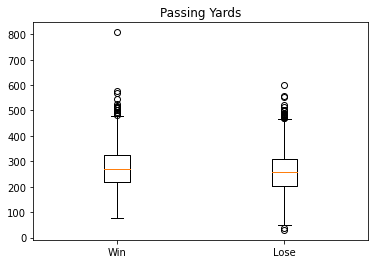

In [29]:
fig, ax = plt.subplots()
ax.boxplot([win_df["PassingYards"].dropna(),loss_df["PassingYards"].dropna()])
plt.xticks([1, 2], ["Win", "Lose"], rotation=0)
plt.title("Passing Yards")
plt.show()

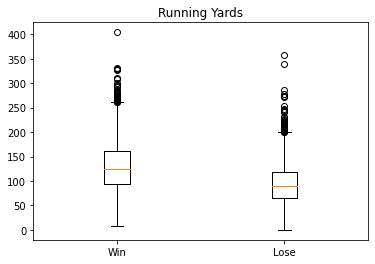

In [30]:
fig, ax = plt.subplots()
ax.boxplot([win_df["RunningYards"].dropna(),loss_df["RunningYards"].dropna()])
plt.xticks([1, 2], ["Win", "Lose"], rotation=0)
plt.title("Running Yards")
plt.show()

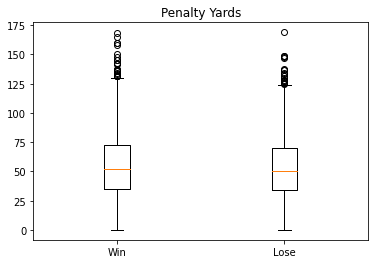

In [31]:
fig, ax = plt.subplots()
ax.boxplot([win_df["PenaltyYards"].dropna(),loss_df["PenaltyYards"].dropna()])
plt.xticks([1, 2], ["Win", "Lose"], rotation=0)
plt.title("Penalty Yards")
plt.show()

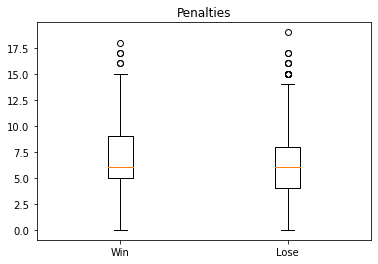

In [32]:
fig, ax = plt.subplots()
ax.boxplot([win_df["Penalties"].dropna(),loss_df["Penalties"].dropna()])
plt.xticks([1, 2], ["Win", "Lose"], rotation=0)
plt.title("Penalties")
plt.show()

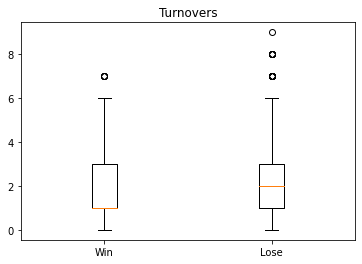

In [33]:
fig, ax = plt.subplots()
ax.boxplot([win_df["Turnovers"].dropna(),loss_df["Turnovers"].dropna()])
plt.xticks([1, 2], ["Win", "Lose"], rotation=0)
plt.title("Turnovers")
plt.show()

## Turn Dataframe into CSV

In [34]:
groupbysortdf.to_csv("NFL_Grouped_Stats_Dataset_for_Model.csv")